In [ ]:
import zipfile

zip_data=zipfile.ZipFile('/content/kerasseedlings.zip')
zip_data.extractall('/content/')
zip_data.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras import Sequential

from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

array([[[ 27,  50,  80],
        [ 18,  42,  71],
        [ 36,  57,  83],
        ...,
        [ 58,  85,  93],
        [ 64,  93,  99],
        [ 48,  82,  88]],

       [[ 20,  45,  77],
        [ 23,  46,  78],
        [ 39,  59,  86],
        ...,
        [ 63,  85,  94],
        [ 59,  82,  91],
        [ 49,  75,  84]],

       [[ 20,  45,  78],
        [ 26,  50,  82],
        [ 39,  59,  87],
        ...,
        [ 63,  81,  92],
        [ 58,  77,  89],
        [ 59,  78,  90]],

       ...,

       [[154, 147, 141],
        [159, 153, 146],
        [155, 149, 142],
        ...,
        [101,  96,  94],
        [ 65,  59,  64],
        [ 57,  50,  56]],

       [[155, 149, 142],
        [156, 150, 143],
        [155, 149, 141],
        ...,
        [ 94,  88,  86],
        [ 72,  66,  70],
        [ 64,  58,  62]],

       [[156, 149, 141],
        [157, 151, 143],
        [155, 149, 140],
        ...,
        [ 97,  91,  89],
        [ 72,  66,  69],
        [ 60,  54,  58]]], dtype=uint8)
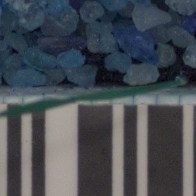

In [ ]:
imag=cv2.imread('/content/Train/Black-grass/0050f38b3.png')
imag

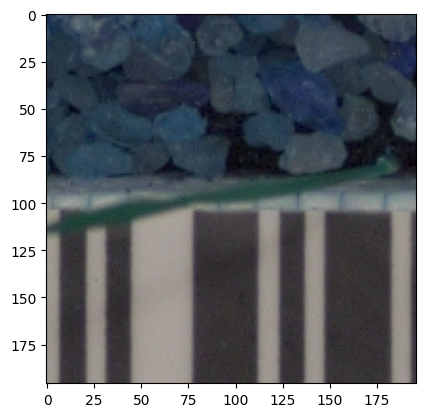

In [ ]:
plt.imshow(imag)

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/Train',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=64,
    image_size=(256, 256)

)

Found 4606 files belonging to 12 classes.


In [ ]:
test_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/validation',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=64,
    image_size=(256, 256)
)


Found 144 files belonging to 12 classes.


In [ ]:
print(f"batches:{4606/32}")

batches:143.9375


In [ ]:
imag.shape

(196, 196, 3)

Found 4606 files belonging to 12 classes.


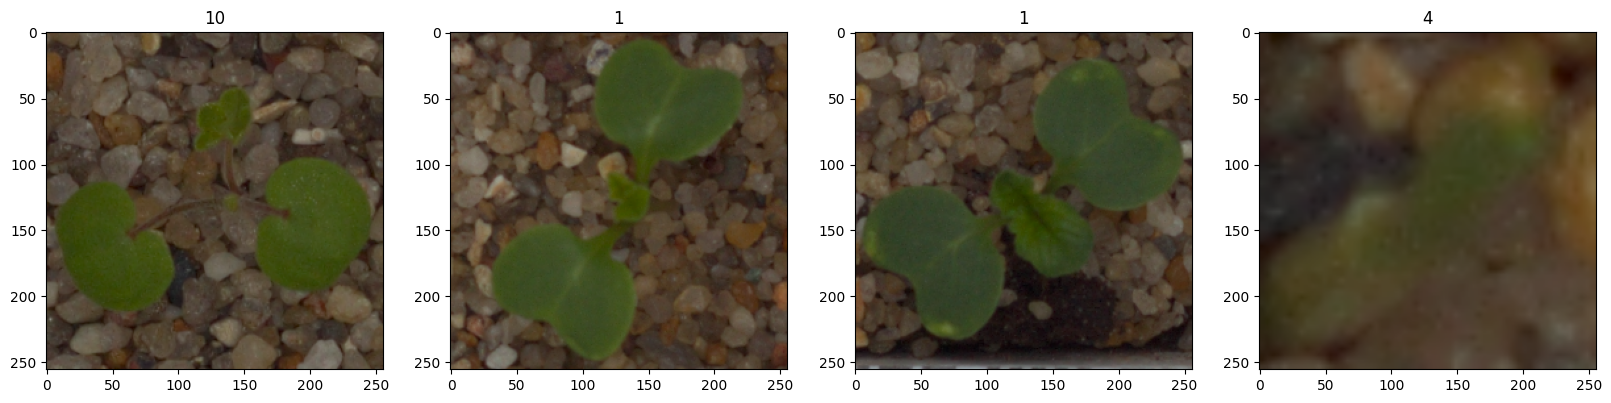

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory('train')

train = train_ds.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train[1][idx])

In [ ]:
train_ds = train_ds.map(lambda x,y: (x/255, y))
train = train_ds.as_numpy_iterator().next()

In [ ]:
train[1]

array([ 8,  5,  2, 11,  5,  5,  6, 10,  5, 10, 11,  3,  1,  2,  4,  6,  5,
        1,  6,  9,  3,  5,  3,  3,  5,  7,  5,  1,  7,  4, 11,  3,  6,  6,
        8,  7,  8,  5,  1,  6,  5,  3,  7,  6,  8,  0, 11,  2,  3,  9,  6,
       10,  2,  8, 11,  3,  3, 10, 11,  6,  6,  3,  4,  0], dtype=int32)

In [ ]:
def scale_down_px(image,label):

  image = tf.cast(image/255, tf.float64)

  return image,label

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size=(3,3), padding='valid',strides=2, activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),  padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid',strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),  padding='valid'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.build()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 127, 127, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 127, 127, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 31, 31, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,049 (976.75 KB)

 Trainable params: 249,601 (975.00 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
print(model.input_shape)

(None, 256, 256, 3)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data = test_ds, epochs=32)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.0767 - loss: -4067.9824 - val_accuracy: 0.0833 - val_loss: -43206.4258
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.0746 - loss: -137635.7812 - val_accuracy: 0.0833 - val_loss: -620677.5625
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.0759 - loss: -1017018.2500 - val_accuracy: 0.0833 - val_loss: -3629263.0000
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.0760 - loss: -4133539.5000 - val_accuracy: 0.0833 - val_loss: -10423583.0000
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.0732 - loss: -12243117.0000 - val_accuracy: 0.0833 - val_loss: -30677014.0000
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.0756 - loss: -28893440.0000 - val_accuracy: 0.0833 - val_loss: -62983408.0000
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.0762 - loss: -59456548.0000 - val_accuracy: 0.0833 - val_loss: -89514296.0000
Epoch 8/10
72

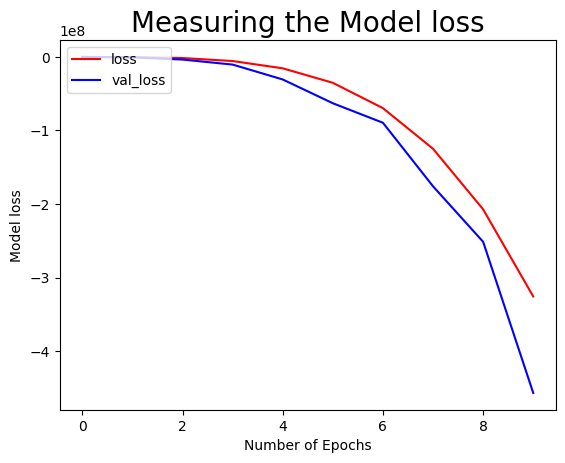

In [ ]:
fig = plt.figure()

plt.plot(history.history['loss'], color='r', label='loss')
plt.plot(history.history['val_loss'], color='b', label='val_loss')
plt.title('Measuring the Model loss' , fontsize=20)
plt.xlabel('Number of Epochs')
plt.ylabel('Model loss')
plt.legend(loc="upper left")
plt.show()

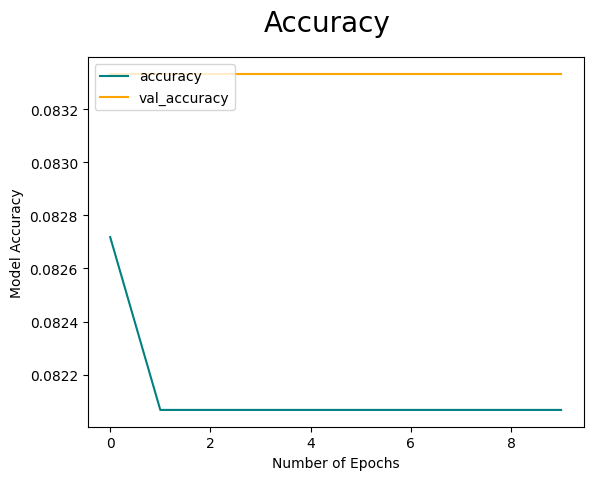

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Number of Epochs')
plt.ylabel('Model Accuracy')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for train in test_ds.as_numpy_iterator():
    X, y = train
    output = model.predict(X)
    pre.update_state(y, output)
    re.update_state(y, output)
    acc.update_state(y, output)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9166667, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.083333336, shape=(), dtype=float32)


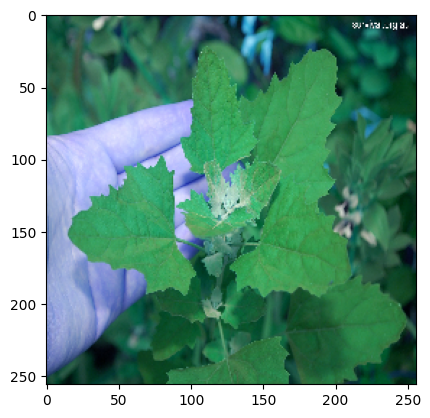

In [ ]:
import cv2
img = cv2.imread('/content/R .png')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
output = model.predict(np.expand_dims(resize/255, 0))
print(f'Output is: {output} \n')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Output is: [[0.4995452]] 



In [ ]:
if output >= 0 and output <= 0.0833:
    print(f'Black - grass')
elif output > 0.0833 and output < 0.1666:
    print("charlock")
elif output > 0.1666 and output < 0.2500:
  print("Cleavers")
elif output >0.2500 and output < 0.3333:
    print("Common Chickweed")
elif output > 0.3333 and output < 0.4166:
      print("Common Wheat")
elif output > 0.4166 and output < 0.5000:
      print("Fat Hen")
elif output > 0.5000 and output < 0.5833:
      print("Loose Silly-bent")
elif output > 0.5833 and output < 0.6666:
      print("Maize")
elif output > 0.6666 and output < 0.7500:
      print("Scentless Mayweed")
elif output > 0.7500 and output < 0.8333:
      print("Shepherds Purse")
elif output > 0.9166 and output < 0.9166:
      print("Small-flawered Cranesbill")
else:
    print(f'Sugar beet')

Fat Hen
